## Explainability Methods for Machine Learning Models
Group 6
Banico, Adrian

Cuaresma, Matthew

Go, Michael Joseph

Rodriguez, Juan Carlos

## I. Training the Random Forest Classifier
The code below was obtained from the module 6 notebook provided by miss Ria.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Loading churn dataset - uploaded to github for easy access

churn_df = pd.read_csv('https://raw.githubusercontent.com/Ades-B/DATA103/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Preparing the data - all code below obtained from Module 6 Notebook. Code by Flora (2024)
model_data = churn_df.copy(deep=True)

#remove customerId column from the model data
model_data.drop("customerID", inplace=True, axis=1)
#convert gender to numeric
model_data.gender = model_data.gender.apply(lambda x: 1 if x == 'Female' else 0)
#convert SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, Churn & etc to binary
for c in ['Partner',
          'Dependents', 'PhoneService',
          'PaperlessBilling', 'Churn']:
    model_data[c] = model_data[c].apply(lambda x: 1 if x == 'Yes' else 0)

#convert TotalCharges to float
model_data.TotalCharges = pd.to_numeric(model_data.TotalCharges, errors='coerce')
model_data.TotalCharges = model_data.TotalCharges.fillna(value=-1)

#one hot encode features with multiple categories
multi_categorical_features = ['InternetService', 'Contract', 'PaymentMethod','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[multi_categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names_out())

model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)

In [ ]:
model_data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                    1           29.85         29.85      0  ...   
1                    0           56.95       1889.50      0  ...   
2                    1           53.85        108.15      1  ...   
3                    0           42.30       1840.75      0  ...   
4                    1           70.70        151.65      1  ...   
...                ...             ...           ...    ...  ...   
7038                 1           84.80       1990.50      0  ...   
7039                 1          103.20       7362.90      0  ...   
7040                 1           29.60        346.45      0  ...   
7041                 1           74.40        306.60      1  ...   
7042                 1          105.65       6844.50      0  ...   

      DeviceProtection_Yes  TechSupport_No  TechSupport_No internet service  \
0                      0.0             1.0                              0.0   
1                      1.0             1.0                              0.0   
2                      0.0             1.0                              0.0   
3                      1.0             0.0                              0.0   
4                      0.0             1.0                              0.0   
...                    ...             ...                              ...   
7038                   1.0             0.0                              0.0   
7039                   1.0             1.0                              0.0   
7040                   0.0             1.0                              0.0   
7041                   0.0             1.0                              0.0   
7042                   1.0             0.0                              0.0   

      TechSupport_Yes  StreamingTV_No  StreamingTV_No internet service  \
0                 0.0             1.0                              0.0   
1                 0.0             1.0                              0.0   
2                 0.0             1.0                              0.0   
3                 1.0             1.0                              0.0   
4                 0.0             1.0                              0.0   
...               ...             ...                              ...   
7038              1.0             0.0                              0.0   
7039              0.0             0.0                              0.0   
7040              0.0             1.0                              0.0   
7041              0.0             1.0                              0.0   
7042              1.0             0.0                              0.0   

      StreamingTV_Yes  StreamingMovies_No  \
0                 0.0                 1.0   
1                 0.0                 1.0   
2                 0.0                 1.0   
3                 0.0                 1.0   
4                 0.0                 1.0   
...               ...                 ...   
7038              1.0                 0.0   
7039              1.0                 0.0   
7040              0.0                 1.0   
7041        

In [ ]:
X = model_data.drop("Churn", axis=1) #store to X the features used for modeling (independent variables)
y = model_data["Churn"]#store to y our target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       '

In [ ]:
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    "n_estimators": range(100, 150, 10),
    "max_depth": range(5,50,5),
    "min_samples_split": np.arange(.1,.6,.1),
    "min_samples_leaf": np.arange(.1,.6,.1),
    "max_features": np.arange(0.1, 0.6, .1)
}

clf = RandomForestClassifier()
clf_grid = RandomizedSearchCV(clf, param_grid, n_iter=150)
clf_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=150,
                   param_distributions={'max_depth': range(5, 50, 5),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'n_estimators': range(100, 150, 10)})

In [ ]:
clf = clf_grid.best_estimator_

In [ ]:
clf_grid.best_estimator_.score(X_test, y_test)

0.7785139611926172

## II. Explainability Methods for Machine Learning Models

 The dataset contains the following features

- customerId - unique identifier for customer
- gender - customer gender male/female
- SeniorCitizen	- indicator if customer is senior citizent 0/1
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines	- Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod	- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

For this dataset our model will be optimized based on the Churn field



## A. SHAP (SHapley Additive exPlanations)

Reference:
Census income classification with XGBoost - utilizes the Tree SHAP https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html

An Introduction to SHAP Values and Machine Learning Interpretability https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

In [ ]:
import shap
shap.initjs()

In [ ]:
# Initialize the SHAP Explainer using the trained random forest model
# This step prepares SHAP to calculate the impact of each feature to the model's predictions.

explainer = shap.Explainer(clf)

# Compute the SHAP values for the test dataset 'X_test'.
# SHAP values quantify the impact of each feature on the predictions for each observation in 'X_test'.
# This line generates SHAP values for each feature and each class

shap_values = explainer.shap_values(X_test)

In [ ]:
print(np.shape(shap_values))

(2113, 40, 2)


In [ ]:
# Extract SHAP values for the class that we are focusing on (Churn =1)
# We only need the SHAP values on the features that impacts on a cutomer churning (with the binary value of 1)
shap_values_class_1 = shap_values[:, :, 1]

### A. Bar Charts of SHAPly scores:

**About SHapley Additive exPlanations (SHAP):**

The bar chart below visualizes the extent of each feature's impact on the model's predictions, using mean absolute SHAP values. SHAP values (SHapley Additive exPlanations) provide a comprehensive view of how each feature contributes to the overall prediction, accounting for both positive and negative influences.

The mean absolute SHAP value reflects the average contribution of each feature across all instances, allowing us to identify the features with the most significant impact on the model's outputs. This metric does not indicate the direction of the effect—whether a feature increases or decreases the predicted outcome—but rather the magnitude of its influence, irrespective of sign.

The features with the most impact is based on this mean SHAP value, which utilizes a methodology rooted in cooperative game theory. This approach allocates the contribution of each feature in a fair manner, ensuring that interactions between features are considered. SHAP values help quantify the importance of each feature by distributing the overall prediction among them based on their contributions.



One of the ways in which the SHAP values can visualize feature importance/impact is through a bar chart:

The bar chart below is ordered in terms of highest impact to the model predictions. It is measured in terms of the mean SHAP value whcih measures the average impact of the feature on the model outputs. As the target variable is binary, the average impact of each is centered on below 1.0. For example, the lartgest contributor, whether the person is on a monthly constract, is responsible for around a little over 0.12

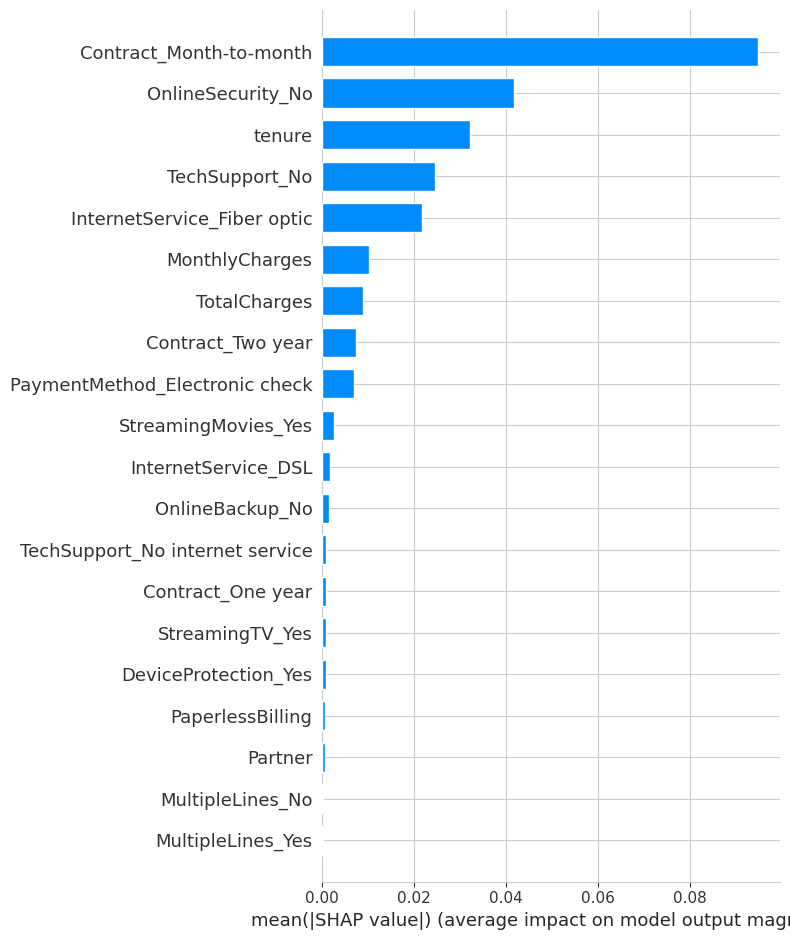

In [ ]:
# Choosing bar plot for plot type

shap.summary_plot(shap_values_class_1, X_test, plot_type="bar")

Based on the results of the bar chart, less than half of the features have any susbtantial influence on whether the customer would churn in the model. The model trained earlier had already selected only the most performing 50% of the features, but even then only around 12 out of 23 have any influence, and only a very few has strong predictive capabilities to customer churn.

The features with the strongest impacts to the predictions according to the shaply values in order are:
1. Whether the customer have month to month contracts
2. Whether the customer has no internet service on oinline security
3. The number of months the customer is with the company
4. Whether the customer has no internet service on tech support
5. Whether the customer has fiber as their internet service
6. Monthly charges paid by the customer
7. The total charges paid by the customer
8. Whether the customer paid through electronic check
9. Whether the customer is in a two-year contract

The variables after those nive variables have very little impact on the model output.

However, while the bar charts provide an overview of the contibutions of each feature, it would also be proven useful on how the feature datapoints also led to the predictions. This can be done through the SHAP summary plot

### B. Summary Plot of SHAP results

The summary plot can be seen below in whcih the colors of the chart and points, red and blue represents the value of the corresponding feature, with red indicating high values and blue indicating low values.
Each point represents a row of data from the original dataset.

The Y-axis indicates the feature names in order of importance from top to bottom. Which similarly to the bar chart, is organized by the highest impact to the lowest
X-axis represents the SHAP value, which indicates the degree of change in log odds.
The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.
Each point represents a row of data from the original dataset.

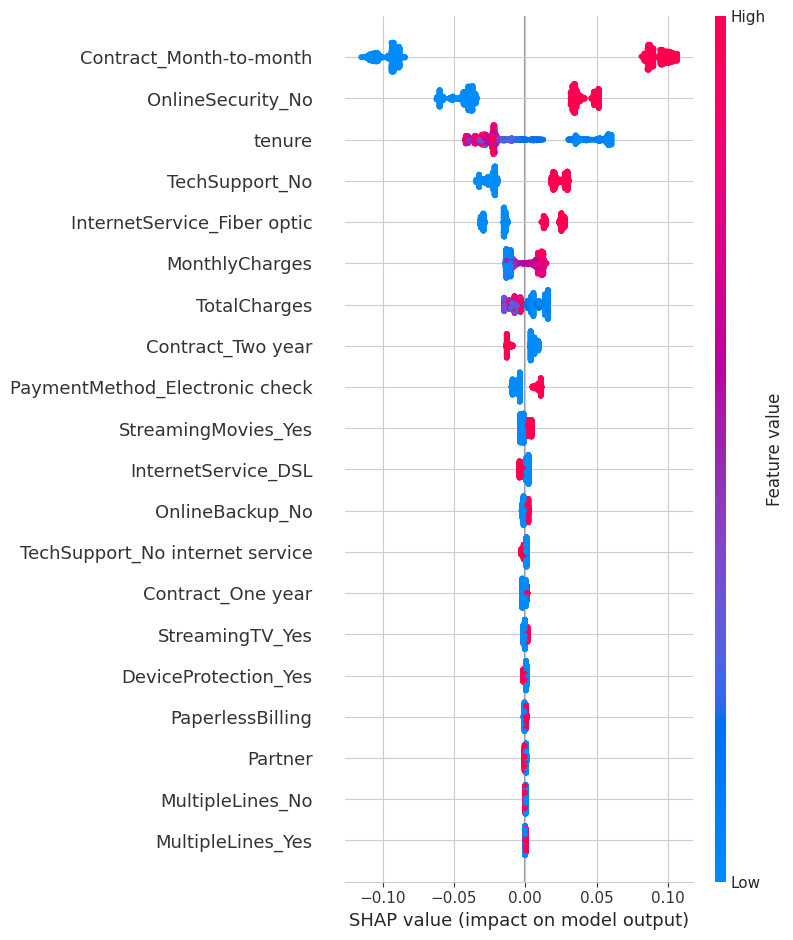

In [ ]:
shap.summary_plot(shap_values_class_1, X_test)

# SHAP Analysis of Findings

SHAP Summary Plot Highlights

The SHAP summary plot clarified the influence and direction of each feature in the churn model. It revealed which features push predictions towards churn (positive SHAP values) or retention (negative SHAP values), with colors showing the interaction between feature values and their impact on the model.

Top Features Impacting Churn Predictions:

- Monthly Contract: The most influential feature, with monthly contracts (binary=1, red in SHAP plot) strongly pushing predictions towards churn. This aligns with the ease of contract cancellation in month-to-month setups.
- Lack of Internet Service on Online Security: Customers without internet service in the online security feature also showed a positive effect on churn, pushing predictions towards leaving the service.
Customer Tenure: Tenure displayed a negative impact, with longer-tenured customers less likely to churn, likely due to satisfaction and loyalty built over time.
- No Internet Service in Tech Support: Similar to online security, customers lacking internet service in tech support pushed the model towards churn predictions.
- Fiber Service: Fiber optic users (binary=1, red) were more likely to churn than customers with other services, possibly due to the availability of alternative fiber providers.


The summary plot allow us to see the impact of each feature in the model as well as how it generally had indluenced the predicitons. We can observe there that the points of the graph either go towards the negative side (left side) or the positive side (right side). Where the point is in indicates how the feature drives the prediciton based on its characteristics. The color of the points as well provides the insight on the relationhip between the value of the feature as well as the contribution of the feature.

1. Top 1 Feature: Whether the customer has a monthly contract (positive)

Take for example the highest impact whcih is whether the customer has a monthly contract, which is a binary value which means red is that the customer has a monthly contract and blue if not. Based on the SHAP values, The red points (higher values) are in the positive impact, which highlight that customers with mothly contracts (monthly =1) influences the model output to classify the customer to churn. The opposite is true for when customers do not have montlhy contracts, seen in the blue points in the feature. This shows that customers who are not in monthly contracts pushed the model to predict that the customer is not likely to stop being a customer.

2. Top 2 Feature: Whether the customer has no internet service on oinline security (positive)

The second highest is whether the customer has no internet service under the question of whether they have online security, which is also binary. If yes, binary is 1 and therefore red in color in the chart. Similarly in the monthly contract, customers who have no internt connection, pushes the model to predict that that person to stop being a customer, and the opposite is true to when the customer has a differnt service than fiber.

3. Top 3 Feature: Tenure of the customer (Negative)

Moving on to the third highest is tenure, although the split between the red, and blue, as well as positive and negative impact is not as homogenous, some blue points went to the negative side, while most are in the positive side. Generally in the model, customers who were with the company for less time were more likely to be predicted to leave the company and people who were with the company more, were more likely to be predicted to not leave.

4. Top 4 Feature: Whether customer has no internet service in tech support (Positive)

The fourth highest feature is the question of tech support in which the person has no internet service. If it is 1, which is red in the graph, the person has no internet, while 0, which is blue of the graph. The SHAP values highlight that the relationship is positive. This can be seen as the red points are in the positive direction, indicating that when the value is 1 (no internet) the nodel shows that the customer is more likely to churn. And when the value is 0 - color blue, the model's outcome moves in not churning

5. Top 5 Feature: Whether the person is a fiber customer (positive)

The fifth highest is the service type which is whether the person availed of the fiber optic connection, which is also binary. If yes, binary is 1 and therefore red in color in the chart. Similarly in the no internet for tech support, customers who have the fiber connection, pushes the model to predict that that person to stop being a customer, and the opposite is true to when the customer has a differnt service than fiber.


# Alignment of Expectations for SHAP
This result is suprising as my personal expectations based on the telco industry and customer churn most likely would place monthly charges as the main reason for customer churn, however this was far from the largest contributor. It was instead whether the customer has a montlhy contract with the company in which they renew each month. This makes sense howfver, as it would allow the customer to easily not renew the contract therefore a person with a monthly contract could easily stop being a customer. Additionally, it was also suprising that whether the person has no internect connection in the question of online security, and tech support, as well as they type of service, particulary whether the person has a fiber optic connection also drives a customer to be predicted to churn. Tenure being one of the strongest impactors to the model is not suprising howver, as people that have stayed with the company longer most likely have a good experience with the service and therefore may be less likely to leave.

These explanations align with our undersatnding of the telcho churn domain as the variables that we expected to impact churn such as tenure, and monthly payments does impact the model prediction in a way. However the results also shed light that there are other characteristics and features that may also predict churn and not just the "usual" variables.


### B. LIME (Local Interpretable Model-agnostic Explanations)

**About LIME (Local Interpretable Model-agnostic Explanations):**

Instead of explaining and understanding the model based on the entire dataset, LIME works by focusing on individual instances, creating local approximations of the model's behavior.

In the Bar Chart




References: Explainable AI - Understanding and Trusting Machine Learning Models https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

Explain your model predictions with LIME https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime/notebook



In [ ]:
! pip install lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.tolist(),
                                                   class_names=['No Churn', 'Churn'], verbose=True, mode='classification')

The tables and bar charts generated by LIME provide an explanation of how individual features contribute to the prediction for a particular data instance.

The table shows the predicted probabilities for each class for the given instance. In binary classification (like churn vs. no churn), it shows the likelihood of the two outcomes (e.g., churn or not churn). The probabilities are represented as numbers between 0 and 1 (or equivalently as percentages).

The bar chart next to the probabilities show the impact of individual features on the prediction. Each feature's contribution is represented as a bar, which can either push the prediction towards a higher probability of churning (positive) or away from it (negative).

Bars going toward the right side of the chart represent features that increase the likelihood of churning and bars going to the left represent features that do the opposite. The bar chart is also sorted in descending order with the highest feature being the one that most strongly impacts the prediction.

On the rightmost side is a table that lists the actual feature values for the current instance. It shows the value of the feature which lead to how it had a particular impact on the prediction.



In [ ]:
j = 5
exp = explainer.explain_instance(X_test.values[j], clf.predict_proba, num_features=8)
exp.show_in_notebook(show_table=True)

Intercept 0.3906056584316392
Prediction_local [0.08362335]
Right: 0.08141281018909079


In [ ]:
exp.as_list()

[('Contract_Month-to-month <= 0.00', -0.18153931465584203),
 ('OnlineSecurity_No <= 0.00', -0.07633269233492211),
 ('TechSupport_No <= 0.00', -0.04520682331666363),
 ('0.00 < InternetService_Fiber optic <= 1.00', 0.042887928003119274),
 ('tenure > 56.00', -0.03301313101354401),
 ('MonthlyCharges > 90.05', 0.014688347462195644),
 ('Contract_Two year > 0.00', -0.014255847165947282),
 ('TotalCharges > 3857.01', -0.014210779811982089)]

**Interpretation**


*   Not having a month-to-month contract has a negative impact on the probability of churning.
* Having online security also decreases the likelihood of churning.
* Having tech support also decreases the probability of churning, but to a lesser degree.
* Having a fiber optic internet service increases the likelihood of churning.
* Clients with a longer tenure (tenure >= 72 months) have a lower probability of churning.
* Having a two year contract lowers the probability of churning.




In [ ]:
j = 10
exp = explainer.explain_instance(X_test.values[j], clf.predict_proba, num_features=8)
exp.show_in_notebook(show_table=True)

Intercept 0.32069447307711707
Prediction_local [0.16636257]
Right: 0.14147745597568892


In [ ]:
exp.as_list()

[('Contract_Month-to-month <= 0.00', -0.18046256013835704),
 ('OnlineSecurity_No <= 0.00', -0.07558038711467556),
 ('0.00 < TechSupport_No <= 1.00', 0.045097789757267956),
 ('0.00 < InternetService_Fiber optic <= 1.00', 0.042173601937524605),
 ('tenure > 56.00', -0.03200573056284945),
 ('Contract_Two year <= 0.00', 0.016169923653543014),
 ('MonthlyCharges > 90.05', 0.01611145367160941),
 ('0.00 < PaymentMethod_Electronic check <= 1.00', 0.014164003886214468)]

**Interpretation**

Similarly to the previous instance,

*   Not having a month-to-month contract significantly decreases the probability of churning.
*   Having online security also decreases the likelihood of churning.
*   Not Having tech support increases the probability of churning.
*   Having a fiber optic internet service increases the likelihood of churning.





In [ ]:
j = 15
exp = explainer.explain_instance(X_test.values[j], clf.predict_proba, num_features=8)
exp.show_in_notebook(show_table=True)

Intercept 0.05974863735441166
Prediction_local [0.4339637]
Right: 0.4303056234222604


In [ ]:
exp.as_list()

[('0.00 < Contract_Month-to-month <= 1.00', 0.180352855686384),
 ('0.00 < OnlineSecurity_No <= 1.00', 0.07501340332730888),
 ('0.00 < TechSupport_No <= 1.00', 0.04473010723991177),
 ('0.00 < InternetService_Fiber optic <= 1.00', 0.043785135166774174),
 ('Contract_Two year <= 0.00', 0.01828265340910228),
 ('0.00 < PaymentMethod_Electronic check <= 1.00', 0.013759573541160773),
 ('1387.40 < TotalCharges <= 3857.01', -0.012178907315197817),
 ('70.57 < MonthlyCharges <= 90.05', 0.010470239081270845)]

**Interpretation**
*   Having a month-to-month contract has a positive impact on the probability of churning.
*   Not having online security has a positive impact on the probability of churning
* Not having tech support has a positive impact on the probability of churning.
* Having a fiber optic internet service has a positive impact on the probability of churning.'
* Not having a two-year contract has a positive impact on the probability of churning.
* Having a shorter tenure (tenure = 23 months) has a slightly negative impact on the probability of churning.

# LIME Analysis of Findings

Based on the LIME data we have analyzed across multiple instances, we can generalize the following aabout the factors that impact to customer churn. It does this by creating slighty modified variations of the instance and observes how it affects the prediction. Then it fits a sample model to determine which features had the most impact toward churning.

1. Customers with month-to-month contracts are more likely to churn. On the other hand, customers on longer contracts (e.g., two-year contracts) have a reduced probability of churning. This is likely because such contracts lock customers into a longer-term commitment, while monthly contracts allow the customer more flexibilty and opportunities to churn if dissatisfied.


2. Internet services with online security reduce the likelihood of customer churning. This implies that customers value security as part of their service.


3. Similarly, having tech support also reduces churning rate. Customers with access to tech support are less likely to leave, indicating that access to troubleshooting and support are a important factor in retaining customers.


4. Customers with fiber optic internet service show an increased likelihood of churn.


5. Customers with a longer tenure are less likely to churn. While customers with a short tenure are more likely to churn. This indicates that customers who have been with a company for a long time are often more familiar with the service are less likely to leave.


6. Customers who use electronic checks as a payment method are slightly more likely to churn.


7. Customers with higher monthly charges tend to be more likely to churn. This suggests that cost is a significant factor when it comes to customer retention, especially if customers do not think the value is worth the price they are paying.


As a whole, the LIME findings have provided clear insights into which features have the most impact on customer churn. Features such as contract types, the online security and tech support, and the sense of cost to value seem to be key factors in customer retention. Moreover, it is worth noting that none of the features had a particularly strong impact over others. Instead, the decision to churn appears to be a combination of various factors that add up.

# Alignment of Expectations for LIME
First, the fact that customers with month-to-month contracts are more likely to churn aligns with the understanding that these customers have greater flexibility to switch providers without penalties. Monthly contracts allow customers to leave whenever they feel dissatisfied or find a better offer, which naturally increases their likelihood of churning. In contrast, longer-term contracts like two-year agreements reduce churn probability, as customers are locked into a commitment that may involve penalties for early termination. This behavior is consistent with the assumption that flexibility increases churn risk, while commitment reduces it.

The finding that internet services with online security and access to tech support reduce churn is also in line with expectations. Security features and tech support add significant value to a service, particularly for customers who value reliable, uninterrupted access and peace of mind regarding data safety. Access to online security suggests a proactive approach to protecting customers' information, which is increasingly important in today's digital world. Tech support, similarly, reassures customers that help is readily available if they encounter issues, which fosters trust and reduces the chances of dissatisfaction leading to churn. Both features indicate that the provider cares about meeting customer needs and delivering a high-quality experience, which boosts retention.

An interesting result is that fiber optic internet customers have a higher likelihood of churning. This might initially seem counterintuitive, as fiber optic offers superior speed and reliability, but it aligns with expectations when we consider other factors. Fiber optic internet often comes at a higher price, which may prompt budget-conscious customers to switch to cheaper alternatives if they don’t perceive enough added value. Additionally, fiber optic customers may have higher service expectations, leading them to churn if these expectations are not consistently met.

Finally, customers with a longer tenure are less likely to churn, while those with a shorter tenure are more likely to leave. This aligns with the idea that long-term customers have built loyalty and familiarity with the service. They’ve invested time and energy in adapting to the provider, which makes switching less appealing. On the other hand, new customers are still evaluating the service and may be more sensitive to issues or competitors' offerings, which increases their churn risk.

The LIME analysis results closely align with industry knowledge and behavioral expectations, but there may be biases on the sampling design and the nature of the data. Nevertheless, it supports the importance of customer retention strategies focused on contract length, enhanced service features, and support for new customers, all of which are effective in building loyalty and reducing churn. These insights validate the model's interpretability and confirm that it’s capturing key drivers of customer behavior, allowing for effective retention-focused decision-making.

# C. Partial Dependence Plot Overview
One of the key concepts of model explainability is the Partial Dependence Plot which analyzes the relationship of the model's predictions over the value of a particular feature. In this code, we try to examine the cover the relationship of all features over a series of plots and we will discuss each implication.

We have to take into account that our encoding technique used is one hot encoding, so generally the values of features would generally be just 0 and 1 for the categorical variables. This is not the case for numerical variables. Now let us perform some analysis.

# Since PDP does not identify the Importance of Each Feature relative to Others:
We determine it by performing the following code below.


```
#Get feature importance
feature_importance = clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
features_df.sort_values(by='Importance', ascending=False)
```



In [ ]:
#Get feature importance
feature_importance = clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
features_df.sort_values(by='Importance', ascending=False)

Feature  Importance
12                  Contract_Month-to-month    0.394393
22                        OnlineSecurity_No    0.169290
4                                    tenure    0.137831
31                           TechSupport_No    0.101585
10              InternetService_Fiber optic    0.071559
8                              TotalCharges    0.035551
7                            MonthlyCharges    0.025079
17           PaymentMethod_Electronic check    0.024170
14                        Contract_Two year    0.014193
13                        Contract_One year    0.005772
25                          OnlineBackup_No    0.005350
9                       InternetService_DSL    0.004299
39                      StreamingMovies_Yes    0.002832
30                     DeviceProtection_Yes    0.002567
32          TechSupport_No internet service    0.002336
6                          PaperlessBilling    0.001105
2                                   Partner    0.001098
36                          StreamingTV_Yes    0.000713
19                         MultipleLines_No    0.000136
21                        MultipleLines_Yes    0.000125
0                                    gender    0.000015
1                             SeniorCitizen    0.000000
11                       InternetService_No    0.000000
38      StreamingMovies_No internet service    0.000000
37                       StreamingMovies_No    0.000000
3                                Dependents    0.000000
35          StreamingTV_No internet service    0.000000
34                           StreamingTV_No    0.000000
33                          TechSupport_Yes    0.000000
5                              PhoneService    0.000000
15  PaymentMethod_Bank transfer (automatic)    0.000000
18               PaymentMethod_Mailed check    0.000000
29     DeviceProtection_No internet service    0.000000
28                      DeviceProtection_No    0.000000
27                         OnlineBackup_Yes    0.000000
26         OnlineBackup_No internet service    0.000000
16    PaymentMethod_Credit card (automatic)    0.000000
24                       OnlineSecurity_Yes    0.000000
23       OnlineSecurity_No internet service    0.000000
20           MultipleLines_No phone service    0.000000

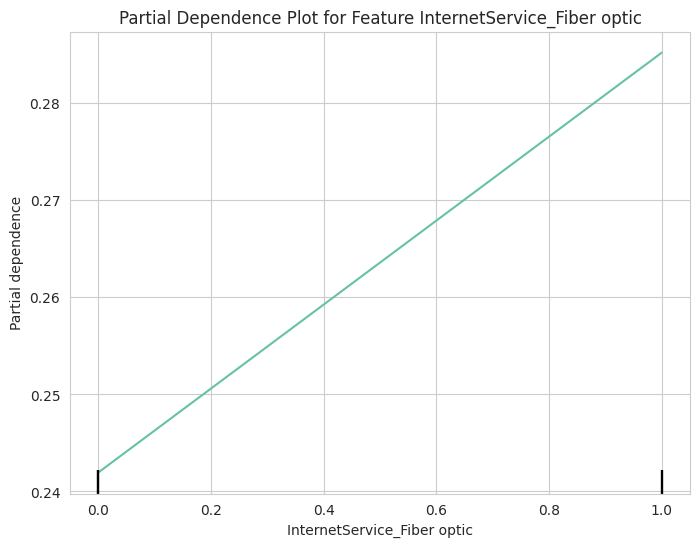

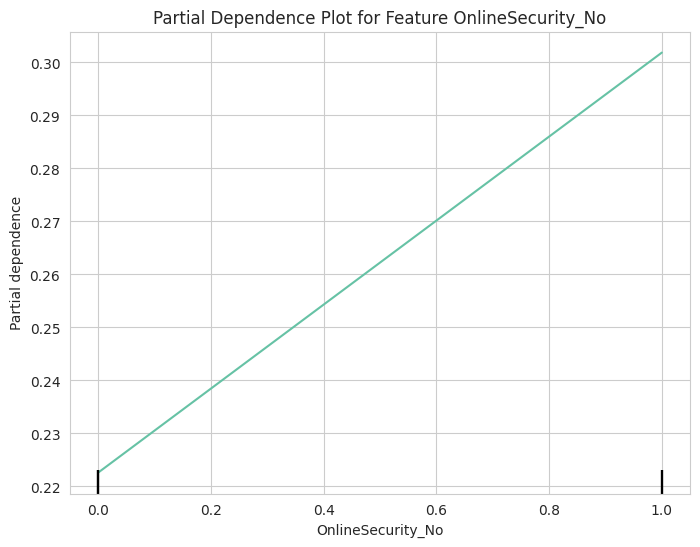

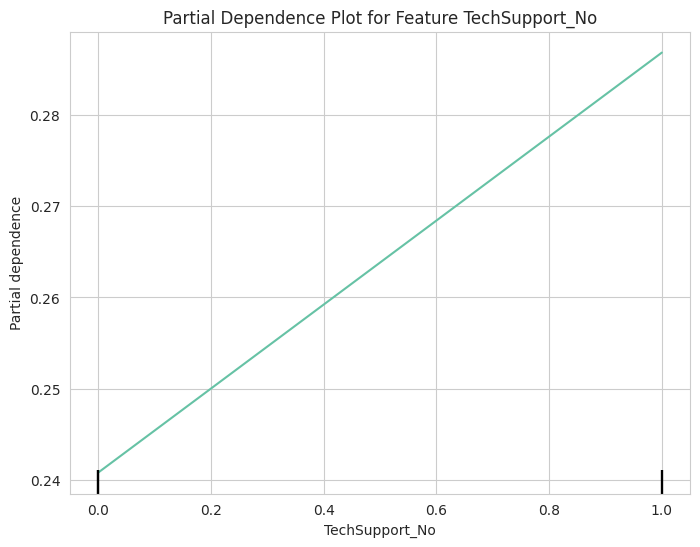

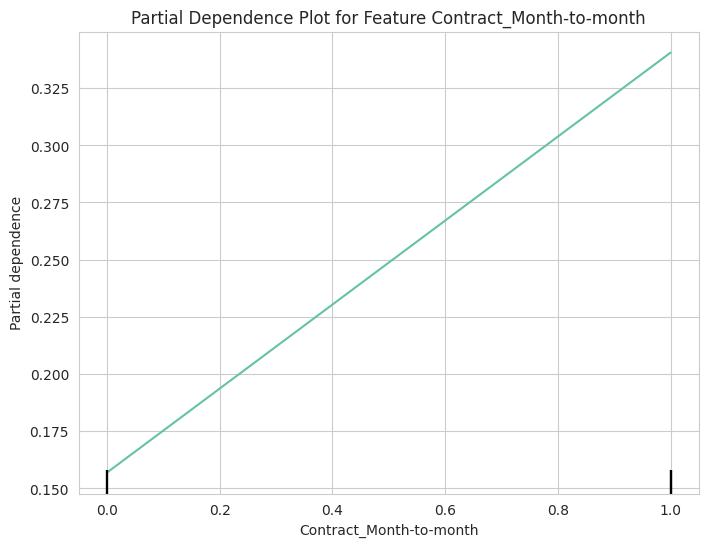

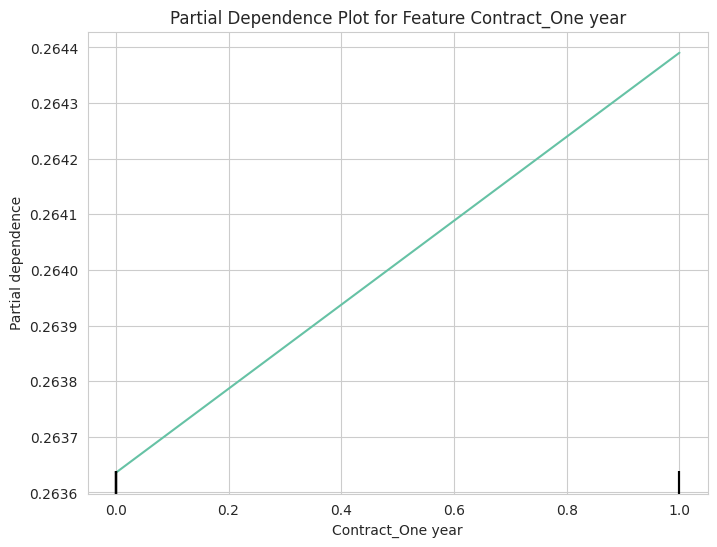

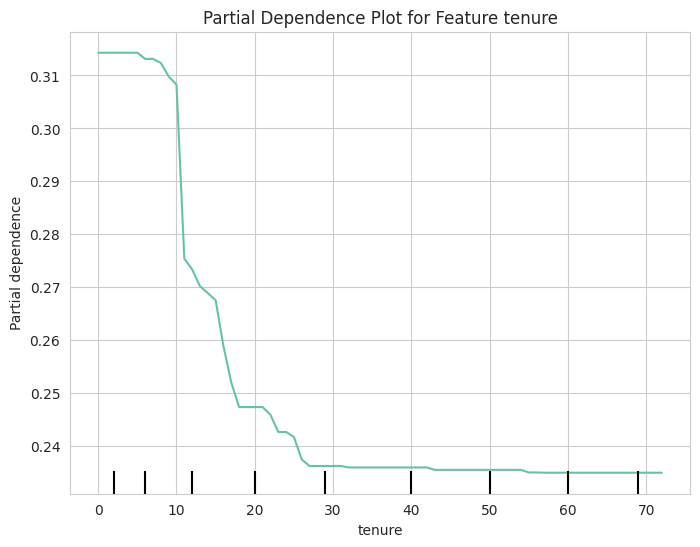

In [ ]:
# List of all features
categorical_features = ['InternetService_Fiber optic',
                        'OnlineSecurity_No',
                        'TechSupport_No', 'Contract_Month-to-month', 'Contract_One year']

numerical_features = ['tenure']

# Convert categorical feature names to indices if needed
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]
numerical_indices = [X.columns.get_loc(col) for col in numerical_features]

# Create a list of features (single feature PDPs)
single_features = categorical_indices + numerical_indices

# Plot individual PDPs for all features (one graph per feature)
for feature in single_features:
    # Create a new figure for each feature
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size for readability
    PartialDependenceDisplay.from_estimator(clf, X, features=[feature], target=0, ax=ax)
    plt.title(f'Partial Dependence Plot for Feature {X.columns[feature]}')  # Set a title for each plot
    plt.show()  # Display the plot

In [ ]:
feature_indices = list(range(26))

# Loop over the feature indices and compute partial dependence for each
for idx in feature_indices:
    # Compute partial dependence for the current feature
    results = partial_dependence(clf, X, [idx])

    # Print the results for the current feature
    print(f"Partial Dependence for Feature {idx}:")
    print("Grid Values:", results["grid_values"])
    print("Average Values:", results["average"])
    print("="*50)  # Separator between results for readability

Partial Dependence for Feature 0:
Grid Values: [array([0, 1])]
Average Values: [[0.26451547 0.2644859 ]]
Partial Dependence for Feature 1:
Grid Values: [array([0, 1])]
Average Values: [[0.26450058 0.26450058]]
Partial Dependence for Feature 2:
Grid Values: [array([0, 1])]
Average Values: [[0.26499611 0.26392978]]
Partial Dependence for Feature 3:
Grid Values: [array([0, 1])]
Average Values: [[0.26450058 0.26450058]]
Partial Dependence for Feature 4:
Grid Values: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])]
Average Values: [[0.31429333 0.31429333 0.31429333 0.31429333 0.31429333 0.31429333
  0.31312843 0.31312843 0.31236988 0.30982414 0.30826931 0.27542772
  0.27338428 0.2702024  0.26889799 0.2675532  0.258

# Summarized PDP Analysis of Findings
Each analysis would be separate from one hot encoded binary/multi categorical variables from those that are numerical.

Hence, in each categorical graph, the x-axis would generally range from 0 and 1 and present itself as a line. Numerical variables would have more erratic manifestations and generally behave more freely.

**Categorical Features**

# Features that have a positive effect on the prediction of the model

1. **The absence of Online Security (3rd in Importance)**

Online security can be a valuable service, especially for customers who prioritize privacy and safety in their online activities. When it’s absent, customers may feel underserved or vulnerable, potentially making them more likely to churn in favor of a competitor that offers this feature.


2. **The absence of Tech Support (4th in Importance)**

Lack of tech support can be a significant pain point, especially for customers who are not tech-savvy and rely on assistance for technical issues. If tech support is unavailable, these customers might feel that they won’t receive adequate help when problems arise, increasing their likelihood of churning.


3. **Month to Month Contract Structure (1st in Importance)**

Month-to-month contracts offer flexibility, allowing customers to leave at any time without penalties. While this flexibility can attract customers initially, it also makes it easier for them to churn, as they’re not bound by a long-term commitment.

4. **The presence of Fiber Optic on Internet Service (5th in Importance)**

Fiber optic internet service is typically associated with higher internet speeds and improved service quality, which can enhance customer satisfaction. Customers with fiber optic internet are often less likely to churn because they experience superior performance for activities such as streaming, gaming, and remote work. Although fiber optic service may come at a higher cost, the benefits of faster speeds and reliability may outweigh the price factor, leading to greater loyalty.

**Numerical Features**
5. **Tenure (2nd in Importance)**
Disconnection of subscription is extremely high during the initial months due to a mismatch in preferences and those who stay or have higher tenure will have company loyalty considering the service provided satisfies the needs of the consumer.




# Alignment of Expectations for PDP
The Partial Dependence Plot (PDP) analysis results largely align with my expectations of customer behavior, highlighting how contract flexibility, tenure, and access to support and security features influence churn. However, some surprising insights, particularly around fiber optic internet, provide a nuanced understanding of customer loyalty dynamics.

The Month-to-Month Contract Structure, ranked as the most important feature, reflects a predictable pattern. Month-to-month contracts offer customers the flexibility to leave whenever they want, making it easier for them to switch if they’re dissatisfied or find a better offer. This finding aligns with the expectation that while month-to-month plans can attract customers initially, the lack of a commitment leads to a higher churn risk.

Tenure, the second most important feature, also aligns with anticipated behavior. The PDP analysis indicates that churn is particularly high during the initial months, likely due to customers assessing whether the service meets their expectations. Those who stay longer tend to build loyalty and are less likely to leave, reflecting that familiarity with the service often leads to customer satisfaction and reduced churn risk. This trend is consistent with the idea that customers who have invested time with a provider are less likely to switch, especially if the service has met their needs.

The absence of Online Security, the third most significant feature, is also in line with expectations. Online security is increasingly important to consumers who prioritize data privacy and safety. When this feature is absent, customers may feel vulnerable or underserved, making them more likely to consider switching to a competitor that offers comprehensive security features. This result underscores the importance of providing added-value services that address customer concerns about privacy.

Similarly, the absence of Tech Support, the fourth most important feature, conforms to my assumptions. For many customers, especially those who aren’t particularly tech-savvy, the availability of tech support is essential. Without reliable tech support, customers may feel uncertain about their ability to resolve technical issues, which can lead to dissatisfaction and a higher likelihood of churn. This aligns with the understanding that access to assistance is a crucial part of the service experience for many users.

The presence of Fiber Optic Internet Service, ranked fifth in importance, was somewhat surprising. Generally, faster and more reliable internet service is expected to lower churn risk by enhancing customer satisfaction, especially for high-demand activities like streaming and gaming. However, the PDP analysis indicates that fiber optic customers might actually have a higher likelihood of churning. This could be due to the higher costs associated with fiber optic service, as some customers may not perceive the increased speed and reliability as worth the extra expense, especially if their internet needs are moderate. This insight suggests that while fiber optic service appeals to high-performance users, it may also lead price-sensitive customers to seek lower-cost alternatives.